In [2]:
"""
The attached file contains a Salinas hyperspectral image.

Reduce its dimensions using PCA.
Perform clustering using k-means for different dimensions and compare the results with the clusters in the salinas_gt file.
"""

'\nThe attached file contains a Salinas hyperspectral image.\n\nReduce its dimensions using PCA.\nPerform clustering using k-means for different dimensions and compare the results with the clusters in the salinas_gt file.\n'

In [3]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import scipy.io

# Load the hyperspectral image and ground truth data
data = scipy.io.loadmat('Salinas.mat')['salinas']
ground_truth = scipy.io.loadmat('Salinas_gt.mat')['salinas_gt']

# Reshape the data to 2D array (pixels x bands)
n_rows, n_cols, n_bands = data.shape
data_reshaped = data.reshape((n_rows * n_cols, n_bands))

# Apply PCA to reduce dimensions
n_components = 10  # Number of principal components

In [ ]:
import numpy as np

class PCA_decomposition:
    def __init__(self, n_components):
        self.n_components = n_components
    
    
    def fit_transform(self, X):
        """Fit the PCA model and apply the dimensionality reduction."""
        n_rows = X.shape[0]
        principal_components = self.pca(X, n_rows, self.n_components)
        return X @ principal_components


In [5]:
pca = PCA_decomposition(n_components)
data_pca = pca.fit_transform(data_reshaped)


Number of clusters: 17


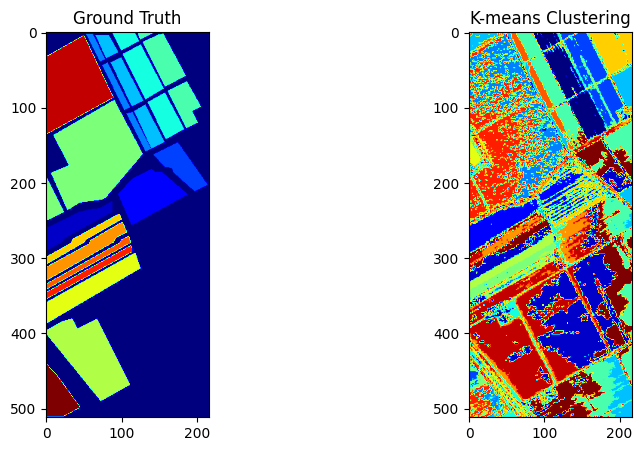

In [19]:
n_clusters = len(np.unique(ground_truth))  # Number of clusters (excluding background)
print(f'Number of clusters: {n_clusters}')
kmeans = KMeans(n_clusters=n_clusters, max_iter=10000)
clusters = kmeans.fit_predict(data_pca)

# Reshape clusters to original image shape
clusters_image = clusters.reshape((n_rows, n_cols))

# Plot the clustering results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Ground Truth')
plt.imshow(ground_truth, cmap='jet')
plt.subplot(1, 2, 2)
plt.title('K-means Clustering')
plt.imshow(clusters_image, cmap='jet')
plt.show()

# Compare clustering results with ground truth
ground_truth_flat = ground_truth.flatten()
clusters_flat = clusters
mask = ground_truth_flat >-1 # Exclude background
accuracy = accuracy_score(ground_truth_flat[mask], clusters_flat[mask])


## Try do with libraries

Number of clusters: 17


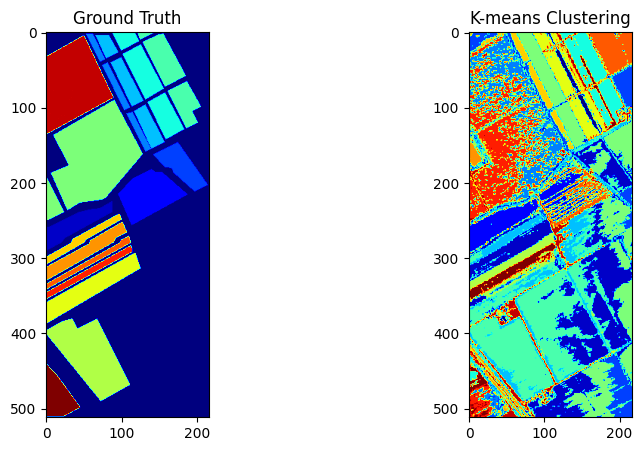

Clustering accuracy: 0.02


In [31]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import scipy.io

# Load the hyperspectral image and ground truth data
data = scipy.io.loadmat('Salinas.mat')['salinas']
ground_truth = scipy.io.loadmat('Salinas_gt.mat')['salinas_gt']

# Reshape the data to 2D array (pixels x bands)
n_rows, n_cols, n_bands = data.shape
data_reshaped = data.reshape((n_rows * n_cols, n_bands))

# Apply PCA to reduce dimensions
n_components = 10  # Number of principal components
pca = PCA(n_components=n_components)
data_pca_1 = pca.fit_transform(data_reshaped)
# Perform k-means clustering
n_clusters = len(np.unique(ground_truth))  # Number of clusters (excluding background)
print(f'Number of clusters: {n_clusters}')
kmeans = KMeans(n_clusters=n_clusters, max_iter=10000)
clusters = kmeans.fit_predict(data_pca)

# Reshape clusters to original image shape
clusters_image = clusters.reshape((n_rows, n_cols))

# Plot the clustering results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Ground Truth')
plt.imshow(ground_truth, cmap='jet')
plt.subplot(1, 2, 2)
plt.title('K-means Clustering')
plt.imshow(clusters_image, cmap='jet')
plt.show()

# Compare clustering results with ground truth
ground_truth_flat = ground_truth.flatten()
clusters_flat = clusters
mask = ground_truth_flat > -1 # Exclude background
accuracy = accuracy_score(ground_truth_flat[mask], clusters_flat[mask])
print(f'Clustering accuracy: {accuracy:.2f}')

In [32]:
data_pca_1

array([[-6.13637278e+03, -4.38571386e+03,  6.28407429e+02, ...,
        -2.78342925e+01, -3.16408008e+01, -6.90574669e+01],
       [-6.19694917e+03, -4.36064584e+03,  5.68280593e+02, ...,
        -4.82489985e+01, -5.66423058e+01, -6.47182735e+01],
       [-6.35950363e+03, -4.69393958e+03,  5.78031043e+02, ...,
        -2.27414265e+01, -2.69216085e+01, -6.81051574e+01],
       ...,
       [-6.74048686e+03, -4.12719798e+03,  5.95007971e+02, ...,
         2.65487647e+01, -1.12521817e+00, -2.38392585e+01],
       [-6.76352778e+03, -4.13519799e+03,  5.79182355e+02, ...,
        -6.52548546e+00,  1.82713938e+01, -1.48355183e+01],
       [-6.66408486e+03, -4.01792051e+03,  5.83419721e+02, ...,
         2.72853664e+01,  2.77516176e+01, -1.64949823e+00]])

In [22]:
#compare data_pca_1 and data_pca
print(np.allclose(data_pca, data_pca_1, atol=1e-1))

False


In [23]:
data_pca

array([[-572.71506514, -651.56982547,  394.58978416, ..., 3106.97494824,
         186.08194099,  800.34335768],
       [-574.88164476, -667.45909363,  399.85817809, ..., 3099.75544589,
         168.78313133,  810.51760918],
       [-556.87917298, -630.37619662,  393.98874333, ..., 3022.25208861,
         172.52637361,  782.21047762],
       ...,
       [-524.2144964 , -698.5973405 ,  411.71991504, ..., 3038.16381864,
         122.9154303 ,  763.65598618],
       [-534.90473722, -689.0298964 ,  415.78504948, ..., 3019.66826561,
         107.08743121,  760.70136196],
       [-560.74190978, -704.43300205,  407.7824979 , ..., 3078.97820482,
         121.99808225,  773.62043696]])

In [30]:
data_pca_1

array([[-6.13637278e+03, -4.38571386e+03,  6.28407429e+02, ...,
        -2.78342925e+01, -3.16408008e+01, -6.90574669e+01],
       [-6.19694917e+03, -4.36064584e+03,  5.68280593e+02, ...,
        -4.82489985e+01, -5.66423058e+01, -6.47182735e+01],
       [-6.35950363e+03, -4.69393958e+03,  5.78031043e+02, ...,
        -2.27414265e+01, -2.69216085e+01, -6.81051574e+01],
       ...,
       [-6.74048686e+03, -4.12719798e+03,  5.95007971e+02, ...,
         2.65487647e+01, -1.12521817e+00, -2.38392585e+01],
       [-6.76352778e+03, -4.13519799e+03,  5.79182355e+02, ...,
        -6.52548546e+00,  1.82713938e+01, -1.48355183e+01],
       [-6.66408486e+03, -4.01792051e+03,  5.83419721e+02, ...,
         2.72853664e+01,  2.77516176e+01, -1.64949823e+00]])

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Standardize the data
scaler = StandardScaler()
data_reshaped_std = scaler.fit_transform(data_reshaped)

# Apply PCA with scikit-learn
pca = PCA(n_components=n_components)
data_pca_sklearn = pca.fit_transform(data_reshaped_std)

# K-means clustering
kmeans = KMeans(n_clusters=n_clusters, max_iter=10000, random_state=42)
clusters_sklearn = kmeans.fit_predict(data_pca_sklearn)

# Reshape clusters to original image shape
clusters_image_sklearn = clusters_sklearn.reshape((n_rows, n_cols))

# Compare results
accuracy_sklearn = accuracy_score(ground_truth_flat[mask], clusters_sklearn[mask])
print(f'Scikit-learn PCA Clustering Accuracy: {accuracy_sklearn:.2f}')

print(data_pca_sklearn)

Scikit-learn PCA Clustering Accuracy: 0.07
[[ -2.19081335 -12.41266018   0.06421627 ...  -0.34542735  -0.3865106
   -0.11170714]
 [ -1.94182407 -12.37415817   0.20663778 ...  -0.20465278   0.45550169
   -0.13589636]
 [ -2.37205849 -12.9291027    1.01000179 ...  -0.34137899  -0.38664837
   -0.09729587]
 ...
 [  0.99077083 -12.08009731  -0.55333843 ...   0.68745753  -0.21278753
   -1.38219424]
 [  1.42887174 -11.99274936   0.85662769 ...   0.70041755   0.28165818
   -1.38982159]
 [  1.49038084 -11.76625304   0.97576029 ...   0.20531549   0.85868158
   -0.0261941 ]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from scipy.io import loadmat

# Salinas ve Salinas GT dosyalarını yükle

data = loadmat('salinas.mat')
salinas = data['salinas']

data_gt = loadmat('salinas_gt.mat')
salinas_gt = data_gt['salinas_gt']

# Veri boyutlarını kontrol et
print("Salinas şekli:", salinas.shape)
print("Salinas GT şekli:", salinas_gt.shape)
# Hiperspektral görüntüyü 2D formata dönüştür
rows, cols, bands = salinas.shape
salinas_reshaped = salinas.reshape(rows * cols, bands)

# PCA uygulayarak boyutları azalt
pca = PCA(n_components=3)  # İlk 3 bileşeni koruyalım
salinas_pca = pca.fit_transform(salinas_reshaped)

# PCA sonucu veriyi eski formata döndür
salinas_pca_image = salinas_pca.reshape(rows, cols, 3)
print("PCA ile azaltılmış veri şekli:", salinas_pca.shape)
# K-Means ile öbekleme
num_clusters = len(np.unique(salinas_gt)) - 1  # GT'deki sınıf sayısını al
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(salinas_pca)

# Öbek sonuçlarını görüntü formatına döndür
kmeans_image = kmeans_labels.reshape(rows, cols)
# Sonuçları görselleştir
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(salinas_pca_image.astype(np.uint8))
axes[0].set_title("PCA ile Azaltılmış Görüntü")
axes[0].axis('off')

axes[1].imshow(kmeans_image, cmap='jet')
axes[1].set_title("K-Means Öbekleme Sonucu")
axes[1].axis('off')

axes[2].imshow(salinas_gt, cmap='jet')
axes[2].set_title("Yerel Doğrular (Ground Truth)")
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from scipy.io import loadmat

# Veriyi yükleme
data = loadmat('salinas.mat')
salinas = data['salinas']

data_gt = loadmat('salinas_gt.mat')
salinas_gt = data_gt['salinas_gt']

# Veri boyutlarını kontrol et
rows, cols, bands = salinas.shape
print("Salinas boyutları:", salinas.shape)
print("Salinas GT boyutları:", salinas_gt.shape)

# Hiperspektral görüntüyü 2D formata dönüştür
salinas_reshaped = salinas.reshape(rows * cols, bands)
print("Salinas reshaped boyutları:", salinas_reshaped.shape)
# PCA ile boyut indirgeme
component_number = 10

pca = PCA(n_components=component_number)  # İlk 3 bileşen
salinas_pca = pca.fit_transform(salinas_reshaped)
#print the shapw
print("PCA ile azaltılmış veri şekli:", salinas_pca.shape)

# PCA sonucu veriyi eski formata döndür
salinas_pca_image = salinas_pca.reshape(rows, cols, component_number)

# Geçerli alanları seç
mask = salinas_gt > 0  # GT'deki geçerli alanları seç
salinas_valid = salinas_pca[mask.flatten()]  # PCA sonrası geçerli alanlar

# K-Means öbekleme
num_clusters = len(np.unique(salinas_gt)) - 1  # Ground truth'daki sınıf sayısı
kmeans = KMeans(n_clusters=num_clusters, random_state=42, init='k-means++', n_init=10)
labels = kmeans.fit_predict(salinas_valid)

# Öbek sonuçlarını görüntü formatına dönüştür
kmeans_image = np.zeros_like(salinas_gt)
kmeans_image[mask] = labels + 1  # 1 tabanlı hale getir

# Performans değerlendirme
true_labels = salinas_gt[mask]
print("Adjusted Rand Index:", adjusted_rand_score(true_labels, labels))
print("Confusion Matrix:\n", confusion_matrix(true_labels, labels))

# Görselleştirme
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# PCA Görselleştirme
#axes[0].imshow((salinas_pca_image - salinas_pca_image.min()) / 
#               (salinas_pca_image.max() - salinas_pca_image.min()))
#axes[0].set_title("PCA ile Azaltılmış Görüntü")
#axes[0].axis('off')

# K-Means Görselleştirme
axes[1].imshow(kmeans_image, cmap='jet')
axes[1].set_title("K-Means Öbekleme Sonucu")
axes[1].axis('off')

# Yerel Doğrular (Ground Truth)
axes[2].imshow(salinas_gt, cmap='jet')
axes[2].set_title("Yerel Doğrular (Ground Truth)")
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
ground_truth_flat

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy import stats
import matplotlib.pyplot as plt
import scipy.io

# Load the hyperspectral image and ground truth data
data = scipy.io.loadmat('Salinas.mat')['salinas']
ground_truth = scipy.io.loadmat('Salinas_gt.mat')['salinas_gt']

# Reshape the data to 2D array (pixels x bands)
n_rows, n_cols, n_bands = data.shape
data_reshaped = data.reshape((n_rows * n_cols, n_bands))

# Apply PCA to reduce dimensions
n_components = min(1000, n_bands)  # Ensure n_components is not greater than n_bands
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_reshaped)

# Perform k-means clustering
n_clusters = len(np.unique(ground_truth))  # Number of clusters (excluding background)
print(f'Number of clusters: {n_clusters}')
kmeans = KMeans(n_clusters=n_clusters, max_iter=1000000, random_state=42)
clusters = kmeans.fit_predict(data_pca)

# Reshape clusters to original image shape
clusters_image = clusters.reshape((n_rows, n_cols))

# Plot the clustering results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Ground Truth')
plt.imshow(ground_truth, cmap='jet')
plt.subplot(1, 2, 2)
plt.title('K-means Clustering')
plt.imshow(clusters_image, cmap='jet')
plt.show()

# Compare clustering results with ground truth
ground_truth_flat = ground_truth.flatten()
clusters_flat = clusters

# Re-label clusters to match ground truth labels (optional, depends on your dataset)
# This is a heuristic for matching clusters to ground truth classes
mode, _ = stats.mode(clusters_flat)
clusters_flat = np.where(clusters_flat == mode, 1, 0)  # Adjust depending on ground_truth

# Compute accuracy
accuracy = accuracy_score(ground_truth_flat, clusters_flat)
print(f'Clustering accuracy: {accuracy:.2f}')


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import scipy.io

# Load the hyperspectral image and ground truth data
data = scipy.io.loadmat('Salinas.mat')['salinas']
ground_truth = scipy.io.loadmat('Salinas_gt.mat')['salinas_gt']

# Reshape the data to 2D array (pixels x bands)
n_rows, n_cols, n_bands = data.shape
data_reshaped = data.reshape((n_rows * n_cols, n_bands))

# Apply PCA to reduce dimensions
n_components = 216  # Choose number of principal components
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_reshaped)

# Perform k-means clustering
n_clusters = len(np.unique(ground_truth)) - 1  # Exclude background
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
clusters = kmeans.fit_predict(data_pca)

# Reshape clusters to original image shape
clusters_image = clusters.reshape((n_rows, n_cols))

# Plot the clustering results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Ground Truth')
plt.imshow(ground_truth, cmap='jet')
plt.subplot(1, 2, 2)
plt.title('K-means Clustering')
plt.imshow(clusters_image, cmap='jet')
plt.show()

# Compare clustering results with ground truth
ground_truth_flat = ground_truth.flatten()
clusters_flat = clusters
mask = ground_truth_flat > 0  # Exclude background

# Adjust cluster labels using Hungarian algorithm
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(ground_truth_flat[mask], clusters_flat[mask])
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
accuracy = conf_matrix[row_ind, col_ind].sum() / mask.sum()

# Evaluate clustering with ARI and NMI
ari = adjusted_rand_score(ground_truth_flat[mask], clusters_flat[mask])
nmi = normalized_mutual_info_score(ground_truth_flat[mask], clusters_flat[mask])

print(f'Clustering accuracy (Hungarian-aligned): {accuracy:.2f}')
print(f'ARI: {ari:.2f}, NMI: {nmi:.2f}')


In [ ]:
print(n_clusters)

In [ ]:
print(np.max(ground_truth))

In [ ]:
print(clusters)

In [ ]:
print(ground_truth)

In [ ]:
print(ground_truth_flat)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import scipy.io

# Load the hyperspectral image and ground truth data
data = scipy.io.loadmat('Salinas.mat')['salinas']

print(data)


In [ ]:
print(data.shape)

In [ ]:
ground_truth = scipy.io.loadmat('Salinas_gt.mat')['salinas_gt']


In [ ]:
print(ground_truth.shape)